In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools

import plotly.io as pio
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

pio.renderers.default = 'colab'

In [ ]:
original_df = pd.read_csv("/content/drive/MyDrive/summary-of-macro-economic-indicators.csv")
original_df.rename(columns={'Description' : 'Year'}, inplace=True)
latest_df = pd.read_csv("/content/drive/MyDrive/summary-of-macro-economic-indicators_2012-2021table06.csv")
latest_df.rename(columns={'Year/Indicators' : 'Year'}, inplace=True)
latest_df

,Year,Percapita GDP (NRs.),Annual Change in nominal percapita GDP (%),Percapita GNI (NRs.),Annual Change in nominal percapita GNI (%),Percapita GNDI (NRs.),Annual Change in nominal percapita GNDI (%),Percapita GDP at constant price (NRs.),Annual Change in real percapita GDP (%),Percapita GNI at constant price (NRs.),...,Gross National Saving as percentage of GDP,Exports of goods and services as percentage of GDP,Imports of goods and services as percentage of GDP,Gross Fixed Capital Formation as percentage of GDP,Resource Gap as percentage of GDP( +/-),Workers' Remittances as percentage of GDP,Product Tax as a percentage of GDP,Total Tax as a percentage of GDP,Exchange rate (US$: NRs),Population (millions)
0,2010/11,58851,NaN,59136,NaN,70755,NaN,58851,NaN,59136,...,27.40,7.80,28.50,24.00,-0.50,16.30,7.96,11.0,72.30,26.50
1,2011/12,65484,11.29,65941,11.52,81686,15.46,60779,3.28,61409,...,33.86,8.75,29.17,23.99,5.26,20.45,8.02,12.0,81.02,26.85
2,2012/13,71627,9.38,72107,9.35,90395,10.66,62083,2.15,63028,...,34.38,9.29,32.57,24.73,4.71,22.29,8.89,13.3,87.96,27.21
3,2013/14,80941,13.00,82129,13.90,105024,16.18,64939,4.60,66708,...,39.12,10.12,35.86,25.25,8.13,24.34,9.47,14.0,98.21,27.58
4,2014/15,86700,7.11,87925,7.06,113321,7.90,66621,2.59,68374,...,38.33,10.21,36.45,27.55,7.05,25.47,9.84,14.7,99.49,27.95
5,2015/16,93762,8.15,94985,8.03,122960,8.51,67240,0.93,68983,...,34.78,8.18,33.94,28.71,6.54,25.50,10.28,16.1,106.35,27.82
6,2016/17,109559,16.85,110662,16.50,140990,14.66,72573,7.93,75109,...,41.67,7.81,36.83,30.58,4.35,22.60,11.64,17.8,106.21,28.09
7,2017/18,121863,11.23,122661,10.84,153151,8.63,77354,6.59,80768,...,40.47,7.82,40.63,32.43,0.92,21.85,12.94,19.1,104.37,28.36
8,2018/19,134766,10.59,136160,11.01,170901,11.59,81711,5.63,85923,...,42.12,7.78,41.47,33.82,0.74,22.79,13.45,18.9,112.88,28.63
9,2019/20,134501,-0.20,136096,-0.05,170069,-0.49,79009,-3.31,81699,...,32.16,6.81,34.11,30.47,1.72,22.50,11.90,18.0,116.31,28.91


In [ ]:
df1 = original_df.set_index("Year").T
df2 = latest_df.set_index("Year")

In [ ]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 2000/01 to 2017/18
Data columns (total 19 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Percapita GDP  (NRs.)                                18 non-null     float64
 1   Percapita GNI  (NRs.)                                18 non-null     float64
 2   Percapita GNDI  (NRs.)                               18 non-null     float64
 3   Percapita GDP at constant price (NRs.)               18 non-null     float64
 4   Percapita GNI at constant price (NRs.)               18 non-null     float64
 5   Percapita GNDI at constant price (NRs.)              18 non-null     float64
 6   Nominal Percapita GDP (US$)                          18 non-null     float64
 7   Nominal Percapita GNI (US$)                          18 non-null     float64
 8   Nominal Percapita GNDI (US$)                         18 non-null  

In [ ]:
df1.columns = df1.columns.str.strip()  # Remove leading/trailing spaces
df2.columns = df2.columns.str.strip()  # Remove leading/trailing spaces

df2_aligned = df2[df1.columns]
df = df1.combine_first(df2_aligned)
df.reset_index(inplace=True)
df.rename(columns={'index': 'Year'}, inplace=True)

In [ ]:
new_col_names = {
    'Percapita GDP  (NRs.)': 'PerCapita_GDP_NRs',
    'Percapita GNI  (NRs.)': 'PerCapita_GNI_NRs',
    'Percapita GNDI  (NRs.)': 'PerCapita_GNDI_NRs',
    'Percapita GDP at constant price (NRs.)': 'PerCapita_GDP_Constant_NRs',
    'Percapita GNI at constant price (NRs.)': 'PerCapita_GNI_Constant_NRs',
    'Percapita GNDI at constant price (NRs.)': 'PerCapita_GNDI_Constant_NRs',
    'Nominal Percapita GDP (US$)': 'Nominal_PerCapita_GDP_USD',
    'Nominal Percapita GNI (US$)': 'Nominal_PerCapita_GNI_USD',
    'Nominal Percapita GNDI (US$)': 'Nominal_PerCapita_GNDI_USD',
    'Final Consumption Expenditure as percentage of GDP': 'Final_Consumption_Expenditure%_GDP',
    'Gross Domestic Saving as percentage of GDP': 'Gross_Domestic_Saving%_GDP',
    'Gross National Saving as percentage of GDP': 'Gross_National_Saving%_GDP',
    'Exports of goods and services as percentage of GDP': 'Exports%_GDP',
    'Imports  of goods and services as percentage of GDP': 'Imports%_GDP',
    'Gross Fixed Capital Formation as percentage of GDP': 'Gross_Fixed_Capital_Formation%_GDP',
    'Resource Gap as percentage of GDP( +/-)': 'Resource_Gap%_GDP',
    'Workers\' Remittances as percentage of GDP': 'Workers_Remittances%_GDP',
    'Exchange rate (US$: NRs)': 'Exchange_Rate_USD_NRs',
    'Population (millions)' : 'Population_(mil)'
}
df.rename(columns=new_col_names, inplace=True)
df

,Year,PerCapita_GDP_NRs,PerCapita_GNI_NRs,PerCapita_GNDI_NRs,PerCapita_GDP_Constant_NRs,PerCapita_GNI_Constant_NRs,PerCapita_GNDI_Constant_NRs,Nominal_PerCapita_GDP_USD,Nominal_PerCapita_GNI_USD,Nominal_PerCapita_GNDI_USD,...,Total_GDP_NRs(mil),Total_GDP_Constant_NRs(mil),GDP_Growth,Trade_Balance(%),Final_Consumption_Expenditure_Amount,Gross_Domestic_Saving_Amount,Gross_National_Saving_Amount,Trade_Balance_Amount,GDP_Deflator,Inflation_Rate
0,2000/01,19072.00,19146.00,21979.00,19072.00,19146.00,21979.00,259.00,260.00,298.00,...,441516.80,441516.80,0.00,-10.68,390035.94,51480.86,118812.17,-47153.99,100.00,NaN
1,2001/02,19410.00,19384.00,22265.00,18675.00,18657.00,21430.00,255.00,254.00,292.00,...,459434.70,442037.25,4.06,-10.75,415834.35,43600.35,111183.20,-49389.23,103.94,3.94
2,2002/03,20337.00,20309.00,23430.00,18984.00,18962.00,21876.00,261.00,261.00,301.00,...,492155.40,459412.80,7.12,-12.85,450026.90,42128.50,116985.34,-63241.97,107.13,3.07
3,2003/04,21689.00,21620.00,25051.00,19436.00,19401.00,22479.00,293.00,292.00,339.00,...,536802.75,481041.00,9.07,-12.78,473728.43,63074.32,146278.75,-68603.39,111.59,4.17
4,2004/05,23292.00,23357.00,27218.00,19670.00,19802.00,23076.00,328.00,329.00,383.00,...,589287.60,497651.00,9.78,-14.90,521165.95,68121.65,167416.61,-87803.85,118.41,6.11
5,2005/06,25279.00,25471.00,30346.00,19884.00,20186.00,24050.00,350.00,352.00,420.00,...,653967.73,514399.08,10.98,-17.87,595241.43,58726.30,189846.83,-116864.03,127.13,7.36
6,2006/07,28905.00,29200.00,34323.00,21129.00,21569.00,25354.00,410.00,414.00,487.00,...,727827.90,532028.22,11.29,-18.86,656355.20,71472.70,207867.65,-137268.34,136.80,7.61
7,2007/08,31946.00,32257.00,39417.00,22110.00,22567.00,27577.00,491.00,496.00,606.00,...,815581.38,564468.30,12.06,-20.48,735409.73,80171.65,270936.13,-167031.07,144.49,5.62
8,2008/09,38172.00,38626.00,48262.00,22793.00,23301.00,29114.00,497.00,502.00,628.00,...,988273.08,590110.77,21.17,-22.24,895078.93,93194.15,354493.55,-219791.93,167.47,15.91
9,2009/10,45435.00,45782.00,56549.00,23561.00,24152.00,29831.00,610.00,614.00,759.00,...,1192668.75,618476.25,20.68,-26.82,1056108.18,136560.57,428287.35,-319873.76,192.84,15.15


In [ ]:
df.isnull().sum()

,0
Year,0
PerCapita_GDP_NRs,0
PerCapita_GNI_NRs,0
PerCapita_GNDI_NRs,0
PerCapita_GDP_Constant_NRs,0
PerCapita_GNI_Constant_NRs,0
PerCapita_GNDI_Constant_NRs,0
Nominal_PerCapita_GDP_USD,0
Nominal_PerCapita_GNI_USD,0
Nominal_PerCapita_GNDI_USD,0


In [ ]:
df.nunique()

,0
Year,22
PerCapita_GDP_NRs,22
PerCapita_GNI_NRs,22
PerCapita_GNDI_NRs,22
PerCapita_GDP_Constant_NRs,22
PerCapita_GNI_Constant_NRs,22
PerCapita_GNDI_Constant_NRs,22
Nominal_PerCapita_GDP_USD,22
Nominal_PerCapita_GNI_USD,22
Nominal_PerCapita_GNDI_USD,22


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
df['Total_GDP_NRs(mil)'] = df['PerCapita_GDP_NRs'] * df['Population_(mil)']
df['Total_GDP_Constant_NRs(mil)'] = df['PerCapita_GDP_Constant_NRs'] * df['Population_(mil)']

df['GDP_Growth'] = df['Total_GDP_NRs(mil)'].pct_change() * 100
df['GDP_Growth'] = df['GDP_Growth'].fillna(0)

In [ ]:
df["Trade_Balance(%)"] =df['Exports%_GDP']-df['Imports%_GDP']
df.at[df.index[-1], 'Year'] = '2021/22'
df['Final_Consumption_Expenditure_Amount'] = (df['Final_Consumption_Expenditure%_GDP'] / 100) * df['Total_GDP_NRs(mil)']
df['Gross_Domestic_Saving_Amount'] = (df['Gross_Domestic_Saving%_GDP'] / 100) * df['Total_GDP_NRs(mil)']
df['Gross_National_Saving_Amount'] = (df['Gross_National_Saving%_GDP'] / 100) * df['Total_GDP_NRs(mil)']
df['Trade_Balance_Amount'] = (df['Trade_Balance(%)'] / 100) * df['Total_GDP_NRs(mil)']
df['GDP_Deflator'] = (df['Total_GDP_NRs(mil)'] / df['Total_GDP_Constant_NRs(mil)']) * 100
df['Inflation_Rate'] = df['GDP_Deflator'].pct_change() * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  22 non-null     object 
 1   PerCapita_GDP_NRs                     22 non-null     float64
 2   PerCapita_GNI_NRs                     22 non-null     float64
 3   PerCapita_GNDI_NRs                    22 non-null     float64
 4   PerCapita_GDP_Constant_NRs            22 non-null     float64
 5   PerCapita_GNI_Constant_NRs            22 non-null     float64
 6   PerCapita_GNDI_Constant_NRs           22 non-null     float64
 7   Nominal_PerCapita_GDP_USD             22 non-null     float64
 8   Nominal_PerCapita_GNI_USD             22 non-null     float64
 9   Nominal_PerCapita_GNDI_USD            22 non-null     float64
 10  Final_Consumption_Expenditure%_GDP    22 non-null     float64
 11  Gross_Domestic_Saving

##Relation Figures of different features

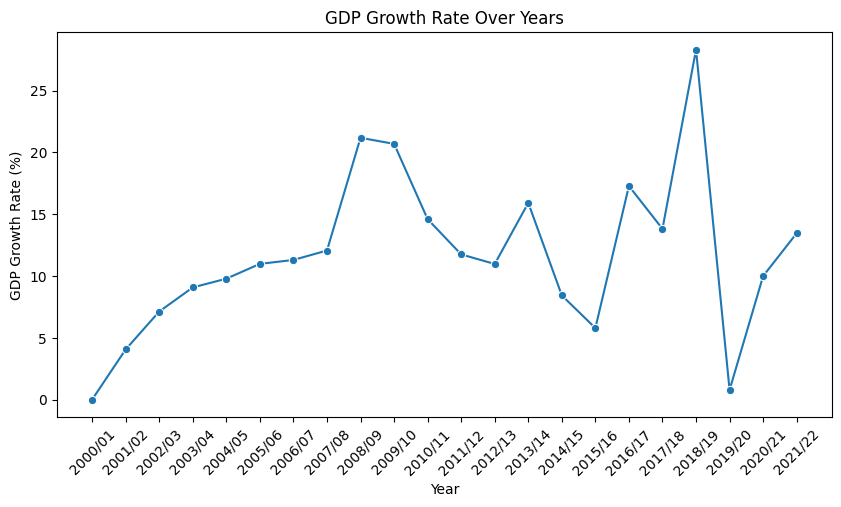

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Year', y='GDP_Growth', marker='o')
plt.title("GDP Growth Rate Over Years")
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.xticks(rotation=45)
plt.show()

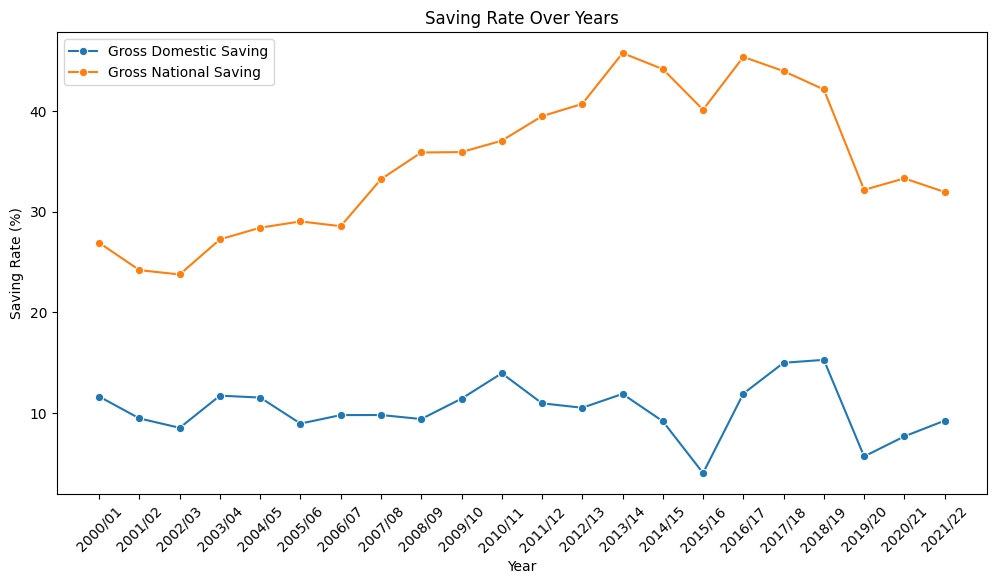

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='Gross_Domestic_Saving%_GDP', marker='o', label='Gross Domestic Saving')
sns.lineplot(data=df, x='Year', y='Gross_National_Saving%_GDP', marker='o', label='Gross National Saving')
plt.title("Saving Rate Over Years")
plt.xlabel('Year')
plt.ylabel('Saving Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

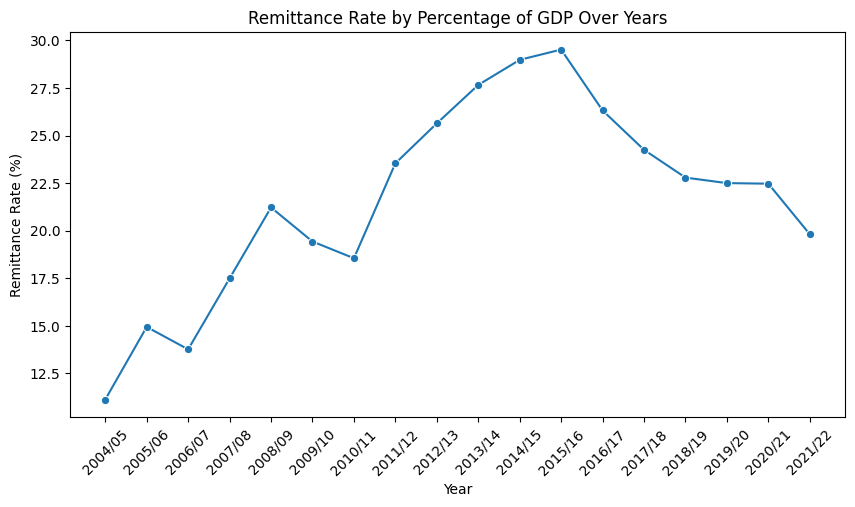

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Year', y='Workers_Remittances%_GDP', marker='o')
plt.title("Remittance Rate by Percentage of GDP Over Years")
plt.xlabel('Year')
plt.ylabel('Remittance Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
trace1 = go.Scatter(
    x=df.Year,
    y=df['Gross_Domestic_Saving_Amount'],
    name = "GDS",
    marker = dict(color = 'rgba(255,128,255,0.8)'),
)
trace2 =go.Scatter(
    x=df.Year,
    y=df['Gross_National_Saving_Amount'],
    xaxis='x2',
    yaxis='y2',
    name='GNS',
    marker =dict(color = 'rgba(85,150,244,0.5)')
)

data = [trace1,trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.05,0.6],
        anchor='y2',
    ),
    yaxis2=dict(
        domain=[0.6,0.95],
        anchor='x2',
    ),
    title ='Gross Saving Amounts Over the Year'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)
plt.show()

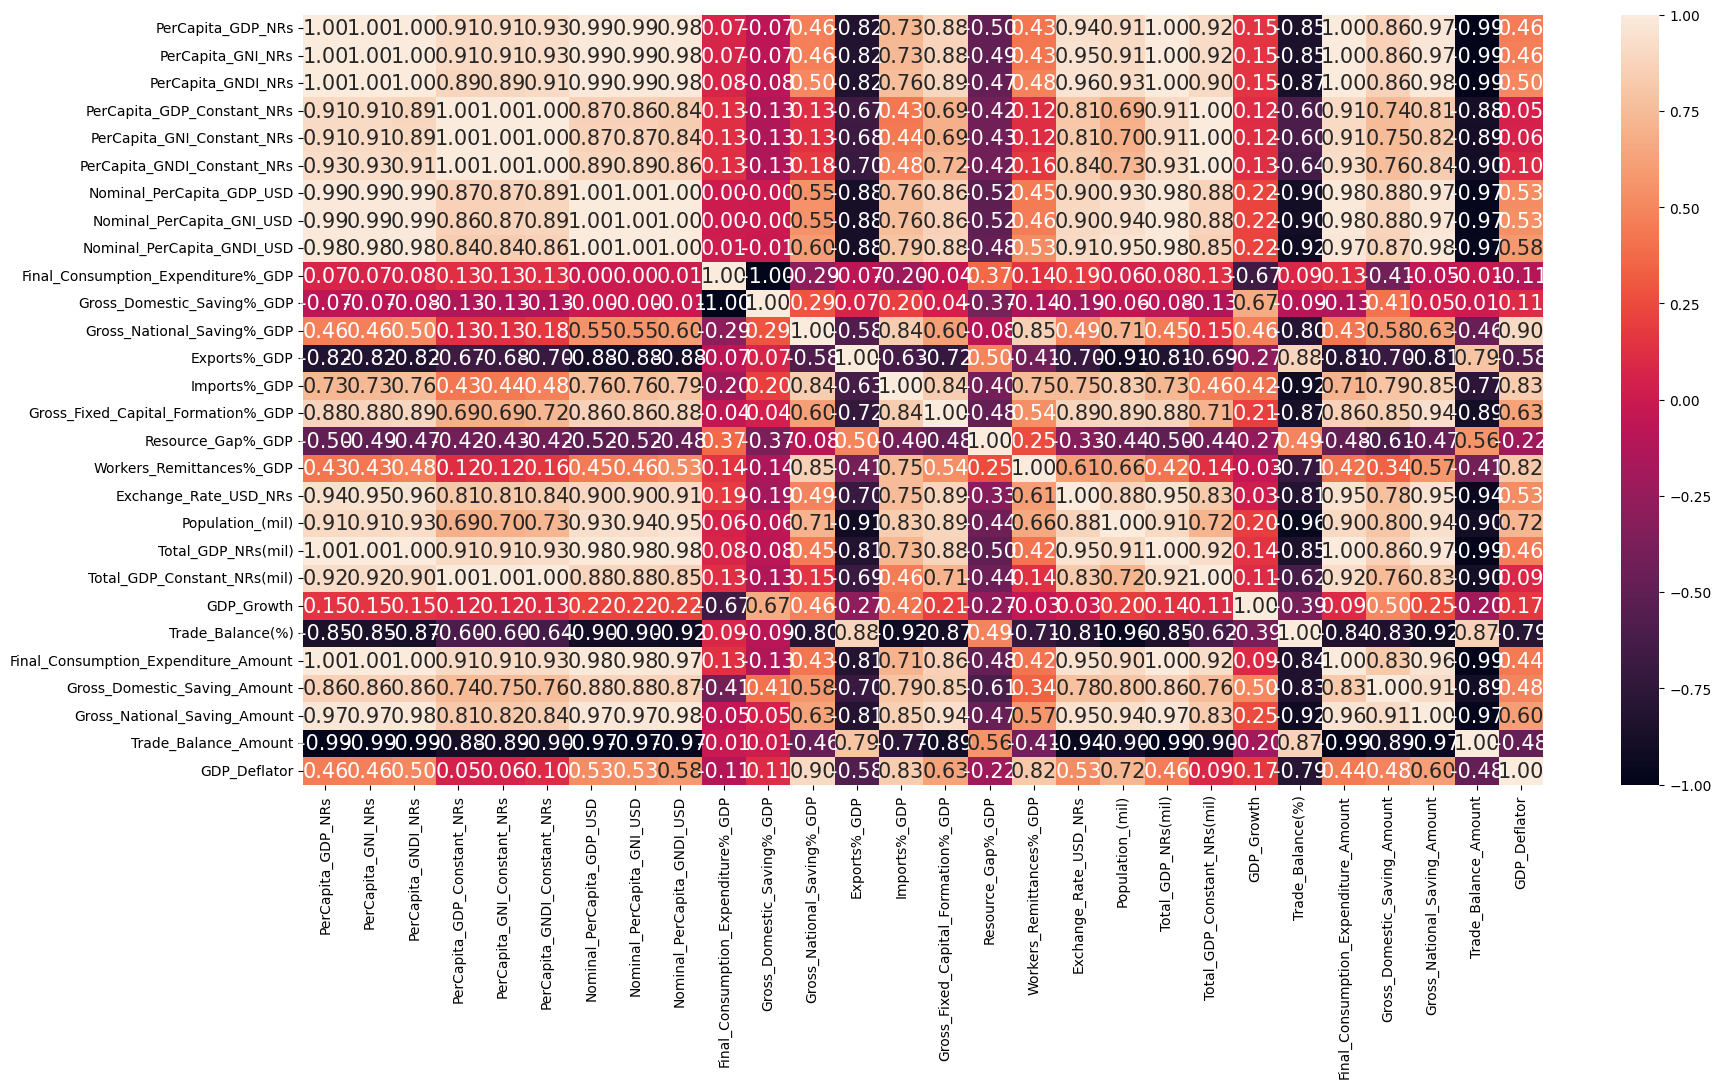

In [ ]:
prepared_df = df.drop(['Year'],axis=1)
corr = prepared_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cbar=True, fmt='.2f', annot_kws={'size':15})
plt.show()

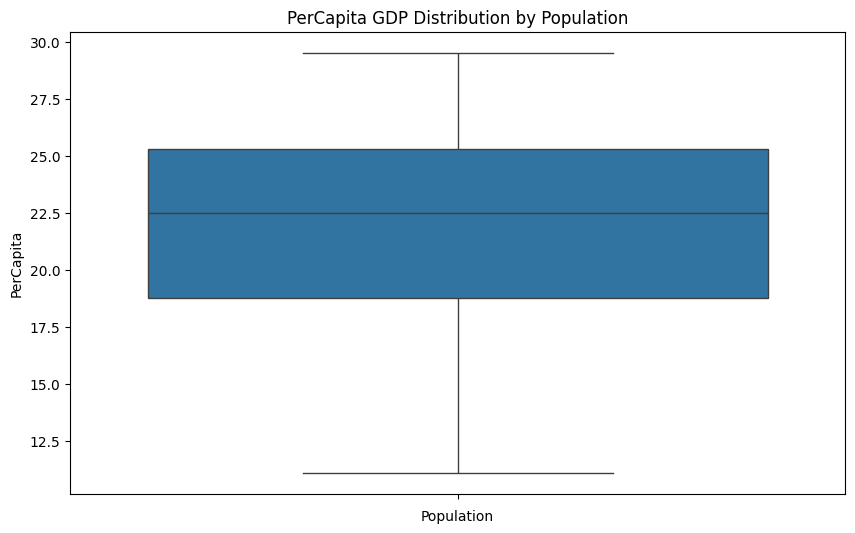

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Workers_Remittances%_GDP', data=df)
plt.title('PerCapita GDP Distribution by Population')
plt.xlabel('Population')
plt.ylabel('PerCapita')
plt.show()

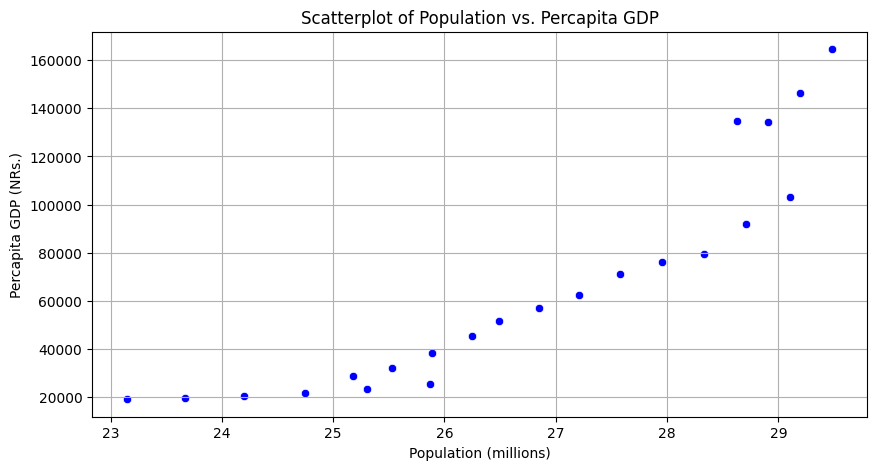

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Population_(mil)', y='PerCapita_GDP_NRs', color='b', marker='o')
plt.title('Scatterplot of Population vs. Percapita GDP')
plt.xlabel('Population (millions)')
plt.ylabel('Percapita GDP (NRs.)')
plt.grid(True)
plt.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df['Year'],
    y=df['Total_GDP_NRs(mil)'],
    name='GDP at Current Price',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=df['Year'],
    y=df['Total_GDP_Constant_NRs(mil)'],
    name='GDP at Constant Price',
    marker_color='orange'
))

# Update layout
fig.update_layout(
    title='Comparison of GDP at Current and Constant Prices',
    xaxis_title='Year',
    yaxis_title='GDP (in million currency units)',
    barmode='group'
)

# Show the figure
fig.show()

##Prediction Model


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [ ]:
features = [
    'Total_GDP_NRs(mil)',
    'Total_GDP_Constant_NRs(mil)',
    'Population_(mil)',
]

# Prepare the feature matrix X and target vector y
X = df[features]
y = df['GDP_Growth'].loc[X.index]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)

# Evaluate Decision Tree Regressor
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree MSE: {round(mse_tree, 2)}")
print(f"Decision Tree R²: {round(r2_tree, 2)}")

# Train Linear Regression
classifier = LinearRegression()
classifier.fit(X_train, y_train)
y_pred_linear = classifier.predict(X_test)

# Evaluate Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression MSE: {round(mse_linear, 2)}")
print(f"Linear Regression R²: {round(r2_linear, 2)}")

Decision Tree MSE: 41.26
Decision Tree R²: 0.34
Linear Regression MSE: 49.8
Linear Regression R²: 0.2


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {round(mse_rf, 2)}")
print(f"Random Forest R²: {round(r2_rf, 2)}")

Random Forest MSE: 41.55
Random Forest R²: 0.33
